## Penjelasan Dataset yang digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3. Import library

import pandas as pd
print("Library Pandas berhasil diimpor.")

Library Pandas berhasil diimpor.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UTS/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
# 2. Penjelasan setiap kolomnya

# Kolom,Tipe Data,Deskripsi
# name,String,Nama pengguna/pelanggan yang memberikan ulasan.
# location,String,Lokasi atau kota asal pengguna.
# Date,String,Tanggal ulasan dibuat.
# Rating,Numerik,Peringkat (bintang) yang diberikan pelanggan (kemungkinan 1-5).
# Review,String,Teks ulasan yang akan menjadi fokus utama untuk Topic Modeling.
# Image_Links,String,Tautan gambar yang mungkin disertakan dalam ulasan.

In [ ]:
# 1. Jumlah baris data
jumlah_baris = df.shape[0]
print(f"Total jumlah baris (ulasan) dalam dataset: {jumlah_baris}")
# 2. Panjang rata-rata setiap baris (pada kolom 'Review')
# Mengganti nilai NaN dengan string kosong untuk menghindari error
df['Review_Length'] = df['post_text'].fillna('').apply(len)
rata_rata_panjang_ulasan = df['Review_Length'].mean()

print(f"Rata-rata panjang teks ulasan (dalam karakter): {rata_rata_panjang_ulasan:.2f}")

Total jumlah baris (ulasan) dalam dataset: 20000
Rata-rata panjang teks ulasan (dalam karakter): 82.46


In [ ]:
# 3. Cek data duplikasi
jumlah_duplikasi = df.duplicated().sum()

print(f"Total jumlah baris yang terduplikasi: {jumlah_duplikasi}")
if jumlah_duplikasi > 0:
    print("Disarankan untuk menghapus duplikasi sebelum analisis mendalam.")

Total jumlah baris yang terduplikasi: 0


In [ ]:
# 4. Cek data kosong (Missing Values)
print("\nJumlah nilai kosong (NaN) per kolom:")
print(df.isnull().sum())


Jumlah nilai kosong (NaN) per kolom:
Unnamed: 0       0
post_id          0
post_created     0
post_text        0
user_id          0
followers        0
friends          0
favourites       0
statuses         0
retweets         0
label            0
Review_Length    0
dtype: int64


## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

In [ ]:
# 2. Panjang rata-rata setiap baris (pada kolom 'Review')
# Mengganti nilai NaN dengan string kosong untuk menghindari error
df['Review_Length'] = df['post_text'].fillna('').apply(len)
rata_rata_panjang_ulasan = df['Review_Length'].mean()

print(f"Rata-rata panjang teks ulasan (dalam karakter): {rata_rata_panjang_ulasan:.2f}")

Rata-rata panjang teks ulasan (dalam karakter): 82.46


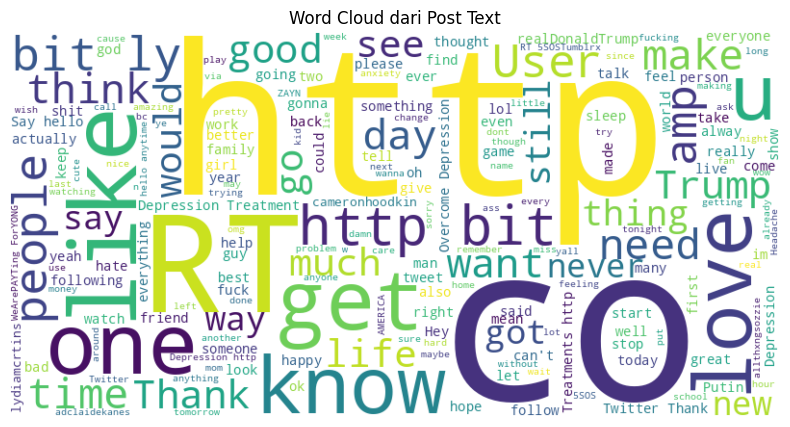

In [ ]:
# 5. Distribusi Data: Kata yang Sering Muncul (Word Cloud)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Menggabungkan semua teks ulasan ke dalam satu string
# Mengganti nilai kosong (NaN) dengan string kosong sebelum menggabungkan
# Assuming the correct column is 'post_text' based on previous interactions
text = " ".join(review for review in df['post_text'].fillna('').astype(str))

# Menghapus kata-kata umum yang tidak relevan (stop words), contoh: 'the', 'a', 'and'
# Anda dapat menambahkan stop words khusus yang relevan dengan dataset
from nltk.corpus import stopwords
custom_stopwords = set(stopwords.words('english'))
# Add custom stopwords if needed, e.g., based on domain or common non-informative words
# custom_stopwords.update(['word1', 'word2'])

# Membuat Word Cloud
wordcloud = WordCloud(
    stopwords=custom_stopwords,
    background_color="white",
    width=800,
    height=400
).generate(text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud dari Post Text') # Corrected the string literal
plt.show()

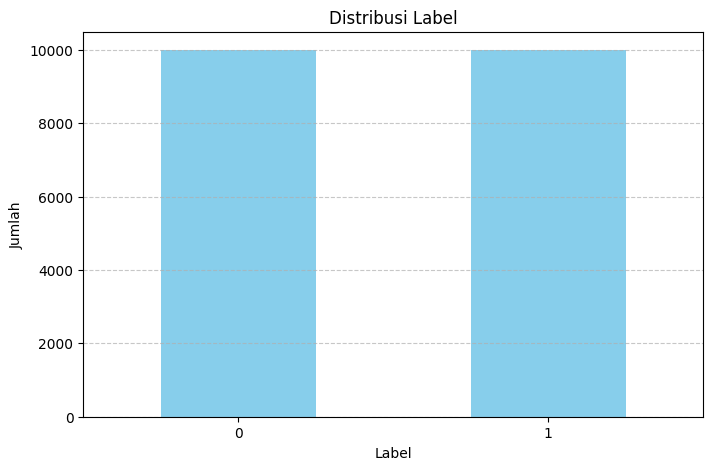

In [ ]:
# Distribusi data menggunakan Bar Chart (Label)
plt.figure(figsize=(8, 5))
df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

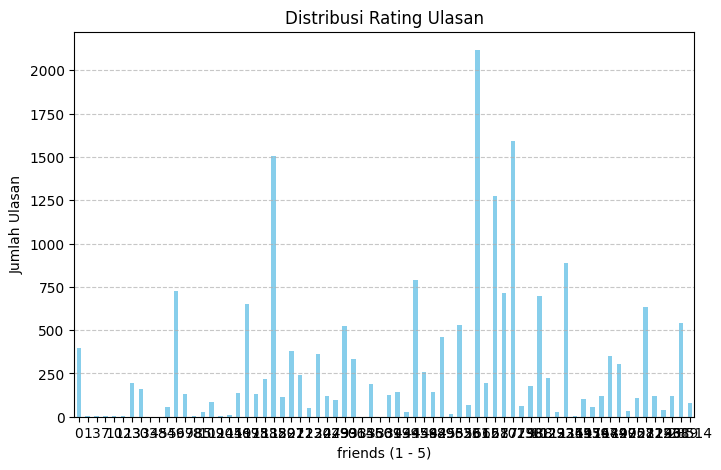

In [ ]:
## 5. Distribusi data menggunakan Bar Chart (friends)
# 5b. Distribusi Rating menggunakan Bar Chart
plt.figure(figsize=(8, 5))
df['friends'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribusi Rating Ulasan')
plt.xlabel('friends (1 - 5)')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label',
       'Review_Length'],
      dtype='object')


## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Text Vektorisasi

In [ ]:
pip install pandas nltk scikit-learn Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/UTS/Mental-Health-Twitter.csv")

In [ ]:
def normalize_text(text):
    text = text.lower()                              # huruf kecil
    text = re.sub(r'\d+', '', text)                  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = text.strip()                              # hapus spasi berlebih
    return text

data['normalized'] = data['post_text'].apply(normalize_text)

In [ ]:
import nltk
# Although we are not using word_tokenize from nltk due to LookupError,
# keeping the import and download for potential future use or other nltk functions.
# nltk.download('punkt', quiet=True, force=True) # Commenting out as it doesn't resolve the issue

# Using a simpler tokenization method as a workaround
data['tokenized'] = data['normalized'].apply(lambda x: x.split())

In [ ]:
stop_words = set(stopwords.words('indonesian'))

data['no_stopwords'] = data['tokenized'].apply(
    lambda tokens: [w for w in tokens if w not in stop_words]
)

In [ ]:
lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['no_stopwords'].apply(
    lambda tokens: [lemmatizer.lemmatize(w) for w in tokens]
)

In [ ]:
print("Contoh hasil preprocessing:")
print(data[['post_text', 'lemmatized']].head())

# The variable tfidf_matrix is not defined in the visible notebook state.
# Assuming the user intended to show the shape after vectorization,
# this line should be executed after TF-IDF vectorization is performed.
# print("\nShape matrix TF-IDF:", tfidf_matrix.shape)

Contoh hasil preprocessing:
                                           post_text  \
0  It's just over 2 years since I was diagnosed w...   
1  It's Sunday, I need a break, so I'm planning t...   
2  Awake but tired. I need to sleep but my brain ...   
3  RT @SewHQ: #Retro bears make perfect gifts and...   
4  It’s hard to say whether packing lists are mak...   

                                          lemmatized  
0  [it, just, over, year, since, i, wa, diagnosed...  
1  [it, sunday, i, need, a, break, so, im, planni...  
2  [awake, but, tired, i, need, to, sleep, but, m...  
3  [rt, sewhq, retro, bear, make, perfect, gift, ...  
4  [it’s, hard, to, say, whether, packing, list, ...  


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih

## Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya

## Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)  # batasi fitur agar tidak terlalu besar

# Join the list of tokens back into a string for each row
lemmatized_text = data['lemmatized'].apply(lambda tokens: ' '.join(tokens))

X_tfidf = vectorizer.fit_transform(lemmatized_text).toarray()

print("Shape TF-IDF:", X_tfidf.shape)

Shape TF-IDF: (20000, 1000)


In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plt

pca = PCA(n_components=2, random_state=42)
# X_tfidf needs to be defined from a vectorization step first
# X_pca = pca.fit_transform(X_tfidf)

# The plotting code below requires X_pca to be defined.
# I am commenting it out for now until X_tfidf is available.
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
# plt.title('Visualisasi PCA dari TF-IDF')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

print("PCA dan seaborn sudah diimpor. Harap lakukan vectorization (misalnya TF-IDF) untuk membuat X_tfidf sebelum menjalankan analisis PCA.")

PCA dan seaborn sudah diimpor. Harap lakukan vectorization (misalnya TF-IDF) untuk membuat X_tfidf sebelum menjalankan analisis PCA.


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
# X_tfidf needs to be defined from a vectorization step first
# X_tsne = tsne.fit_transform(X_tfidf)

# The plotting code below requires X_tsne to be defined.
# I am commenting it out for now until X_tfidf is available.
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1])
# plt.title('Visualisasi t-SNE dari TF-IDF')
# plt.xlabel('Dimensi 1')
# plt.ylabel('Dimensi 2')
# plt.show()

# =====================================
# 13. (OPSIONAL) SIMPAN HASIL
# =====================================
# data['PCA_1'] = X_pca[:,0] # X_pca needs to be defined
# data['PCA_2'] = X_pca[:,1] # X_pca needs to be defined
# data['TSNE_1'] = X_tsne[:,0] # X_tsne needs to be defined
# data['TSNE_2'] = X_tsne[:,1] # X_tsne needs to be defined

# data.to_csv('hasil_preprocessing_dengan_pca_tsne.csv', index=False) # Uncomment after PCA and t-SNE are computed
# print("\n✅ Proses selesai! File hasil disimpan: hasil_preprocessing_dengan_pca_tsne.csv")

print("TSNE, matplotlib, dan seaborn sudah diimpor. Harap lakukan vectorization (misalnya TF-IDF) dan PCA untuk membuat X_tfidf dan X_pca sebelum menjalankan analisis t-SNE dan menyimpan hasilnya.")

TSNE, matplotlib, dan seaborn sudah diimpor. Harap lakukan vectorization (misalnya TF-IDF) dan PCA untuk membuat X_tfidf dan X_pca sebelum menjalankan analisis t-SNE dan menyimpan hasilnya.
